In [3]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re

dataset_path = "../moviereviews/family/tt1865505_reviews.csv"

reviews = pd.read_csv(dataset_path,encoding = 'utf-8')

In [4]:
from nltk.corpus import stopwords
from pywsd.utils import lemmatize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    new_text = re.sub('<.*?>', '', text)   # remove HTML tags
    new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
    new_text = re.sub(r'\d+','',new_text) # remove numbers
    new_text = new_text.lower() # lower case, .upper() for upper
    return new_text

def tokenization_w(texts):
    tokenized_texts = []
    for text in texts:
        w_token = word_tokenize(text)
        filtered_sentence = [w for w in w_token if not w in stop_words]
        tokenized_texts.append(filtered_sentence)
    return tokenized_texts

def lemmatization(stem_array):
    lemmatized = []
    for stems in stem_array:
        lemmas = [lemmatize(x) for x in stems]
        lemmatized.append(lemmas)
    return lemmatized

In [5]:
reviews['Reviews'] = reviews['Reviews'].apply(preprocess)

tokens = tokenization_w(reviews['Reviews'])

#stemmed = stemming(tokens)

lemmatized_data = lemmatization(tokens)

processed_data = [' '.join(list) for list in lemmatized_data]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(processed_data)

vectorizer = TfidfVectorizer(min_df=1,stop_words='english')
tfidf_data = vectorizer.fit_transform(processed_data)

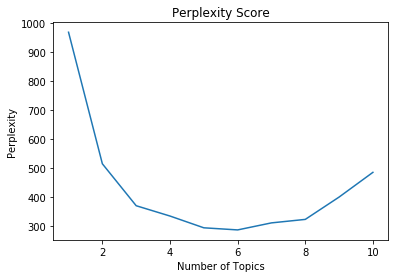

In [28]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from matplotlib import pyplot as plt

perp_scores = []
increment_by = 1
max_topic = 11
alpha = 0.1
beta = 0.1
l_method = 'online'

for i in range(1, max_topic):
    n_topics = increment_by * i
    lda = LDA(n_components=n_topics,
              n_jobs=-1,
              learning_method= l_method,
             )
    lda.fit(count_data)
    perplexity = lda.perplexity(count_data) / n_topics
    perp_scores.append(perplexity)

np_scores = np.array(perp_scores)

x_base = np.arange(1,max_topic) 
x = increment_by * x_base

perp_scores_tf = []
for i in range(1, max_topic):
    n_topics = increment_by * i
    lda = LDA(n_components=n_topics,
              n_jobs=-1,
              learning_method= l_method,
              max_iter=max_iteration
             )
    lda.fit(tfidf_data)
    perplexity = lda.perplexity(tfidf_data) / n_topics
    perp_scores_tf.append(perplexity)

np_scores_tf = np.array(perp_scores_tf)

x_base_tf = np.arange(1,max_topic) 
x_tf = increment_by * x_base
plt.title("Perplexity Score") 
plt.xlabel("Number of Topics") 
plt.ylabel("Perplexity") 
plt.plot(x, np_scores)
#plt.plot(x_tf, np_scores_tf)
plt.show()